In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import neighbors
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from scipy.stats import pointbiserialr, spearmanr
#from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn import metrics
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import KFold, cross_val_score


%matplotlib inline

data = pd.read_csv("Total.csv")
data

,Unnamed: 0,name,address,Additional address,telephone,specialty1,specialty2,specialty3,specialty4,specialty5,...,Accepted Issurance33,Accepted Issurance34,Accepted Issurance35,Accepted Issurance36,Accepted Issurance37,Accepted Issurance38,Accepted Issurance39,Accepted Issurance40,Accepted Issurance41,Accepted Issurance42
0,0,LynnA Kelsey,Eagle River Wasilla Houston-willow Palmer Anch...,NaN,(970) 987-9170,Chronic Pain,Internet Addiction,Sex Therapy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Carolyn E Phillips,2600 Denali St Anchorage Alaska 99503,NaN,(907) 244-9197,Mood Disorders,Self Esteem,Relationship Issues,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mind Performance Center,240 West Laurel Avenue Foley Alabama 36535,NaN,(251) 597-8787,Depression,ADHD,Autism,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Sun N Oberle,119 Westbury SW Suite A Huntsville Alabama 35802,1355 Bakers Chapel Lane Guntersville Alabama 3...,(256) 712-0150,Marital and Premarital,Life Coaching,Coping Skills,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Amy Decker,Little Rock Arkansas 72227,NaN,(501) 408-2553,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Paul Tyler Hickerson,106 East Main Street Russellville Arkansas 72801,NaN,(479) 439-9433,Anxiety,Depression,Behavioral Issues,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Kristi Proch,9332 E Raintree Scottsdale Arizona 85260,21448 N 75th Ave Glendale Arizona 85308,(602) 492-9794,Trauma and PTSD,Relationship Issues,Anxiety,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Lily Tolhurst,Tucson Arizona 85701,NaN,(917) 746-5722,Sex Therapy,Relationship Issues,Trauma and PTSD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,"Celeste L. Cheatham, LPC, LLC","1845 South Dobson Rd, Ste 111 Mesa Arizona 85202",20860 N Tatum Blvd Phoenix Arizona 85050,(480) 427-0410,Domestic Violence,Sexual Abuse,Relationship Issues,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Maki Obana,3200 N Dobson Rd Chandler Arizona 85224,NaN,(480) 721-4880,Sexual Abuse,Racial Identity,Depression,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
 data['client_focus_special_cases'].fillna('missing')
data.head()


,Unnamed: 0,name,address,Additional address,telephone,specialty1,specialty2,specialty3,specialty4,specialty5,...,Accepted Issurance33,Accepted Issurance34,Accepted Issurance35,Accepted Issurance36,Accepted Issurance37,Accepted Issurance38,Accepted Issurance39,Accepted Issurance40,Accepted Issurance41,Accepted Issurance42
0,0,LynnA Kelsey,Eagle River Wasilla Houston-willow Palmer Anch...,NaN,(970) 987-9170,Chronic Pain,Internet Addiction,Sex Therapy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Carolyn E Phillips,2600 Denali St Anchorage Alaska 99503,NaN,(907) 244-9197,Mood Disorders,Self Esteem,Relationship Issues,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mind Performance Center,240 West Laurel Avenue Foley Alabama 36535,NaN,(251) 597-8787,Depression,ADHD,Autism,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Sun N Oberle,119 Westbury SW Suite A Huntsville Alabama 35802,1355 Bakers Chapel Lane Guntersville Alabama 3...,(256) 712-0150,Marital and Premarital,Life Coaching,Coping Skills,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Amy Decker,Little Rock Arkansas 72227,NaN,(501) 408-2553,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
del data['cancer_case']

In [30]:
import re
data['cancer_case'] = data['client_focus_special_cases'].str.extract('(Cancer)', expand=True)
data

,Unnamed: 0,name,address,Additional address,telephone,specialty1,specialty2,specialty3,specialty4,specialty5,...,Accepted Issurance34,Accepted Issurance35,Accepted Issurance36,Accepted Issurance37,Accepted Issurance38,Accepted Issurance39,Accepted Issurance40,Accepted Issurance41,Accepted Issurance42,cancer_case
0,0,LynnA Kelsey,Eagle River Wasilla Houston-willow Palmer Anch...,NaN,(970) 987-9170,Chronic Pain,Internet Addiction,Sex Therapy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cancer
1,1,Carolyn E Phillips,2600 Denali St Anchorage Alaska 99503,NaN,(907) 244-9197,Mood Disorders,Self Esteem,Relationship Issues,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mind Performance Center,240 West Laurel Avenue Foley Alabama 36535,NaN,(251) 597-8787,Depression,ADHD,Autism,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Sun N Oberle,119 Westbury SW Suite A Huntsville Alabama 35802,1355 Bakers Chapel Lane Guntersville Alabama 3...,(256) 712-0150,Marital and Premarital,Life Coaching,Coping Skills,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Amy Decker,Little Rock Arkansas 72227,NaN,(501) 408-2553,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Paul Tyler Hickerson,106 East Main Street Russellville Arkansas 72801,NaN,(479) 439-9433,Anxiety,Depression,Behavioral Issues,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cancer
6,6,Kristi Proch,9332 E Raintree Scottsdale Arizona 85260,21448 N 75th Ave Glendale Arizona 85308,(602) 492-9794,Trauma and PTSD,Relationship Issues,Anxiety,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Lily Tolhurst,Tucson Arizona 85701,NaN,(917) 746-5722,Sex Therapy,Relationship Issues,Trauma and PTSD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cancer
8,8,"Celeste L. Cheatham, LPC, LLC","1845 South Dobson Rd, Ste 111 Mesa Arizona 85202",20860 N Tatum Blvd Phoenix Arizona 85050,(480) 427-0410,Domestic Violence,Sexual Abuse,Relationship Issues,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Maki Obana,3200 N Dobson Rd Chandler Arizona 85224,NaN,(480) 721-4880,Sexual Abuse,Racial Identity,Depression,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data['cancer_case'].fillna('missing')
data['cancer_case_num'] = np.where(data.cancer_case == 'Cancer', 1, 0)
data.head()


,Unnamed: 0,name,address,Additional address,telephone,specialty1,specialty2,specialty3,specialty4,specialty5,...,Accepted Issurance35,Accepted Issurance36,Accepted Issurance37,Accepted Issurance38,Accepted Issurance39,Accepted Issurance40,Accepted Issurance41,Accepted Issurance42,cancer_case,cancer_case_num
0,0,LynnA Kelsey,Eagle River Wasilla Houston-willow Palmer Anch...,NaN,(970) 987-9170,Chronic Pain,Internet Addiction,Sex Therapy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cancer,1
1,1,Carolyn E Phillips,2600 Denali St Anchorage Alaska 99503,NaN,(907) 244-9197,Mood Disorders,Self Esteem,Relationship Issues,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,Mind Performance Center,240 West Laurel Avenue Foley Alabama 36535,NaN,(251) 597-8787,Depression,ADHD,Autism,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,Sun N Oberle,119 Westbury SW Suite A Huntsville Alabama 35802,1355 Bakers Chapel Lane Guntersville Alabama 3...,(256) 712-0150,Marital and Premarital,Life Coaching,Coping Skills,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,Amy Decker,Little Rock Arkansas 72227,NaN,(501) 408-2553,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [40]:
data['ChronicPain_num1'] = np.where(data.specialty1 == 'Chronic Pain', 1, 0)
data['ChronicPain_num2'] = np.where(data.specialty2 == 'Chronic Pain', 1, 0)
data['ChronicPain_num3'] = np.where(data.specialty3 == 'Chronic Pain', 1, 0)
data['ChronicPain_num4'] = np.where(data.specialty4 == 'Chronic Pain', 1, 0)
data['ChronicPain_num5'] = np.where(data.specialty5 == 'Chronic Pain', 1, 0)
data['ChronicPain_num6'] = np.where(data.specialty6 == 'Chronic Pain', 1, 0)

data['SexTherapy_num1'] = np.where(data.specialty1 == 'Sex Therapy', 1, 0)
data['SexTherapy_num2'] = np.where(data.specialty2 == 'Sex Therapy', 1, 0)
data['SexTherapy_num3'] = np.where(data.specialty3 == 'Sex Therapy', 1, 0)
data['SexTherapy_num4'] = np.where(data.specialty4 == 'Sex Therapy', 1, 0)
data['SexTherapy_num5'] = np.where(data.specialty5 == 'Sex Therapy', 1, 0)
data['SexTherapy_num6'] = np.where(data.specialty6 == 'Sex Therapy', 1, 0)

data['RelIssues_num1'] = np.where(data.specialty1 == 'Relationship Issues', 1, 0)
data['RelIssues_num2'] = np.where(data.specialty2 == 'Relationship Issues', 1, 0)
data['RelIssues_num3'] = np.where(data.specialty3 == 'Relationship Issues', 1, 0)
data['RelIssues_num4'] = np.where(data.specialty4 == 'Relationship Issues', 1, 0)
data['RelIssues_num5'] = np.where(data.specialty5 == 'Relationship Issues', 1, 0)
data['RelIssues_num6'] = np.where(data.specialty6 == 'Relationship Issues', 1, 0)

data['Depression_num1'] = np.where(data.specialty1 == 'Depression', 1, 0)
data['Depression_num2'] = np.where(data.specialty2 == 'Depression', 1, 0)
data['Depression_num3'] = np.where(data.specialty3 == 'Depression', 1, 0)
data['Depression_num4'] = np.where(data.specialty4 == 'Depression', 1, 0)
data['Depression_num5'] = np.where(data.specialty5 == 'Depression', 1, 0)
data['Depression_num6'] = np.where(data.specialty6 == 'Depression', 1, 0)

data['Anxiety_num1'] = np.where(data.specialty1 == 'Anxiety', 1, 0)
data['Anxiety_num2'] = np.where(data.specialty2 == 'Anxiety', 1, 0)
data['Anxiety_num3'] = np.where(data.specialty3 == 'Anxiety', 1, 0)
data['Anxiety_num4'] = np.where(data.specialty4 == 'Anxiety', 1, 0)
data['Anxiety_num5'] = np.where(data.specialty5 == 'Anxiety', 1, 0)
data['Anxiety_num6'] = np.where(data.specialty6 == 'Anxiety', 1, 0)

data['Substanceab_num1'] = np.where(data.specialty1 == 'Substance Abuse', 1, 0)
data['Substanceab_num2'] = np.where(data.specialty2 == 'Substance Abuse', 1, 0)
data['Substanceab_num3'] = np.where(data.specialty3 == 'Substance Abuse', 1, 0)
data['Substanceab_num4'] = np.where(data.specialty4 == 'Substance Abuse', 1, 0)
data['Substanceab_num5'] = np.where(data.specialty5 == 'Substance Abuse', 1, 0)
data['Substanceab_num6'] = np.where(data.specialty6 == 'Substance Abuse', 1, 0)

data['Addiction_num1'] = np.where(data.specialty1 == 'Addiction', 1, 0)
data['Addiction_num2'] = np.where(data.specialty2 == 'Addiction', 1, 0)
data['Addiction_num3'] = np.where(data.specialty3 == 'Addiction', 1, 0)
data['Addiction_num4'] = np.where(data.specialty4 == 'Addiction', 1, 0)
data['Addiction_num5'] = np.where(data.specialty5 == 'Addiction', 1, 0)
data['Addiction_num6'] = np.where(data.specialty6 == 'Addiction', 1, 0)

data

,Unnamed: 0,name,address,Additional address,telephone,specialty1,specialty2,specialty3,specialty4,specialty5,...,Substanceab_num3,Substanceab_num4,Substanceab_num5,Substanceab_num6,Addiction_num1,Addiction_num2,Addiction_num3,Addiction_num4,Addiction_num5,Addiction_num6
0,0,LynnA Kelsey,Eagle River Wasilla Houston-willow Palmer Anch...,NaN,(970) 987-9170,Chronic Pain,Internet Addiction,Sex Therapy,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,Carolyn E Phillips,2600 Denali St Anchorage Alaska 99503,NaN,(907) 244-9197,Mood Disorders,Self Esteem,Relationship Issues,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Mind Performance Center,240 West Laurel Avenue Foley Alabama 36535,NaN,(251) 597-8787,Depression,ADHD,Autism,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,3,Sun N Oberle,119 Westbury SW Suite A Huntsville Alabama 35802,1355 Bakers Chapel Lane Guntersville Alabama 3...,(256) 712-0150,Marital and Premarital,Life Coaching,Coping Skills,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,Amy Decker,Little Rock Arkansas 72227,NaN,(501) 408-2553,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5,5,Paul Tyler Hickerson,106 East Main Street Russellville Arkansas 72801,NaN,(479) 439-9433,Anxiety,Depression,Behavioral Issues,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6,6,Kristi Proch,9332 E Raintree Scottsdale Arizona 85260,21448 N 75th Ave Glendale Arizona 85308,(602) 492-9794,Trauma and PTSD,Relationship Issues,Anxiety,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,7,Lily Tolhurst,Tucson Arizona 85701,NaN,(917) 746-5722,Sex Therapy,Relationship Issues,Trauma and PTSD,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8,8,"Celeste L. Cheatham, LPC, LLC","1845 South Dobson Rd, Ste 111 Mesa Arizona 85202",20860 N Tatum Blvd Phoenix Arizona 85050,(480) 427-0410,Domestic Violence,Sexual Abuse,Relationship Issues,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9,9,Maki Obana,3200 N Dobson Rd Chandler Arizona 85224,NaN,(480) 721-4880,Sexual Abuse,Racial Identity,Depression,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [39]:
dummies = pd.get_dummies(data)
dummy_data = dummies.values

# shape the features and response 
X = dummy_data[:, :-1]
y = dummy_data[:, -1]
print(X.shape, y.shape)

(2915, 15108) (2915,)


In [41]:
from sklearn.neighbors import KNeighborsClassifier
X = data[['ChronicPain_num1', 'ChronicPain_num2', 'SexTherapy_num1', 'RelIssues_num1', 'RelIssues_num2', 'Depression_num1', 'Depression_num2','Anxiety_num1','Anxiety_num2','Substanceab_num3','Addiction_num1','Addiction_num2']]
y = data.cancer_case_num
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
k_range = np.arange(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(max(scores))

0.695473251029


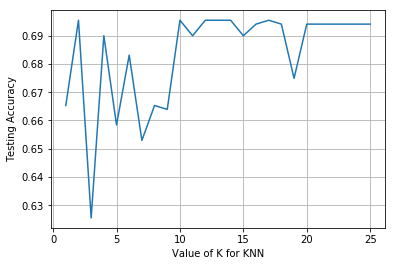

In [42]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)

In [43]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.68998628257887518